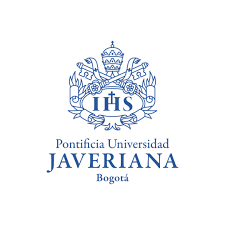
***Pontificia Universidad Javeriana***
# **Procesamiento de Alto Volumen de Datos**

### Taller: **SQL con PySpark**

Autor: Johan A. Espitia C.

Fecha: 5 de mayo del 2025

**Objetivo**: Uso de SQL como motor de Consultas sobre DataFrame Spark.

Proporciona una abstracción de programación denominada DataFrames y también puede actuar como motor de consulta SQL distribuido. Permite ejecutar consultas Hadoop Hive no modificadas hasta 100 veces más rápido en implementaciones y datos existentes. También proporciona una potente integración con el resto del ecosistema Spark (por ejemplo, integrando el procesamiento de consultas SQL con MLib).

Spark SQL aporta soporte nativo para SQL a Spark y agiliza el proceso de consulta de datos almacenados tanto en RDD como en fuentes externas. Spark SQL difumina convenientemente las líneas entre RDDs y tablas relacionales. Spark SQL permite:

- Importar datos relacionales de archivos Parquet y tablas Hive
- Ejecutar consultas SQL sobre datos importados y RDDs existentes
- Escribir fácilmente RDDs en tablas Hive o archivos Parquet.

Spark SQL también incluye un optimizador basado en costes, almacenamiento en columnas y generación de código para agilizar las consultas. Al mismo tiempo, escala a miles de nodos y consultas de varias horas utilizando el motor Spark, que proporciona una tolerancia total a fallos a mitad de consulta, sin tener que preocuparse de utilizar un motor diferente para los datos históricos.

____________________________________________________

**1.- Crear sessión PySpark SQL**



```
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TallerSQL").getOrCreate()
```



In [ ]:
from pyspark.sql.functions import col, when, avg
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TallerSQL").getOrCreate()

**2.-Crear DataFrame Spark:**
- Al menos 15 registros: nombres y edades entre (10 y 70 años)**
- Mostrar dataframe

```
df00 = spark.createDataFrame(
        [
            ("nombre1", 22),
            ("nombre2", 31),
        ],
        ["Nombre", "Edad"],
)
```

In [ ]:
df00 = spark.createDataFrame(
        [
            ("Julian", 22),
            ("David", 31),
            ("Andres", 12),
            ("Juan", 13),
            ("George", 14),
            ("Liliana", 15),
            ("Natalia", 10),
            ("Roberto", 17),
            ("Johan", 18),
            ("Alejandro", 40),
            ("Nicolas", 30),
            ("Santiago", 34),
            ("Sebastian", 18),
            ("Andres", 11),
            ("Juliana", 55),
        ],
        ["Nombre", "Edad"],
)

**3.- Agregue una nueva columna "Etapa":**
- Niño: menores de 12 años
- Adolescente: menores de 19 años
- Adulto: mayor que 19 años
- Mostrar dataframe



```
df1 = df.withColumn(
    "nombreColumna",
    when(col("nom") < 100, "vivo")
    .when(col("nom").between(100, 180), "novivo")
    .otherwise("nacer"),
)
```

In [ ]:
df01 = df00.withColumn(
    "Etapa",
    when(col("Edad") < 12, "Niño")
    .when(col("Edad").between(12, 19), "Adolescente")
    .otherwise("Adulto"),
)

df01.show(15)

+---------+----+-----------+
|   Nombre|Edad|      Etapa|
+---------+----+-----------+
|   Julian|  22|     Adulto|
|    David|  31|     Adulto|
|   Andres|  12|Adolescente|
|     Juan|  13|Adolescente|
|   George|  14|Adolescente|
|  Liliana|  15|Adolescente|
|  Natalia|  10|       Niño|
|  Roberto|  17|Adolescente|
|    Johan|  18|Adolescente|
|Alejandro|  40|     Adulto|
|  Nicolas|  30|     Adulto|
| Santiago|  34|     Adulto|
|Sebastian|  18|Adolescente|
|   Andres|  11|       Niño|
|  Juliana|  55|     Adulto|
+---------+----+-----------+



**4.- Filtre los datos que son solo 'Adolescentes y Adultos'**


```
dfA.where(col("columna").isin(["vivo", "novivo"])).show()
```

In [ ]:
df01.where(col("Etapa").isin(["Adolescente", "Adulto"])).show()

+---------+----+-----------+
|   Nombre|Edad|      Etapa|
+---------+----+-----------+
|   Julian|  22|     Adulto|
|    David|  31|     Adulto|
|   Andres|  12|Adolescente|
|     Juan|  13|Adolescente|
|   George|  14|Adolescente|
|  Liliana|  15|Adolescente|
|  Roberto|  17|Adolescente|
|    Johan|  18|Adolescente|
|Alejandro|  40|     Adulto|
|  Nicolas|  30|     Adulto|
| Santiago|  34|     Adulto|
|Sebastian|  18|Adolescente|
|  Juliana|  55|     Adulto|
+---------+----+-----------+



### Consultas al Dataframe por SQL

**5.- Consulte el promedio de la columna Edad**



```
spark.sql("select avg(Edad) from {dfB}", dfB=dfB).show()
```

In [ ]:
df01.createOrReplaceTempView("df01_sql") # Creamos una vista para trabajar de mejor forma con las consultas sql

In [ ]:
spark.sql("select round(avg(Edad),2) from df01_sql").show()

+-------------------+
|round(avg(Edad), 2)|
+-------------------+
|              22.67|
+-------------------+



**6.- Consulte el promedio de la columna Edad por Etapa**



```
spark.sql("select colStage, avg(edad) from {dfH} group by colStage", dfH=dfH).show()
```



In [ ]:
spark.sql("select Etapa, round(avg(edad),2) from df01_sql group by Etapa").show()

+-----------+-------------------+
|      Etapa|round(avg(edad), 2)|
+-----------+-------------------+
|Adolescente|              15.29|
|       Niño|               10.5|
|     Adulto|              35.33|
+-----------+-------------------+



**7.- Persistencia: crear un tabla para ser facilmente accesible por el API SQL**

- Crear la tabla
- Mostrar la tabla creada
- Insertar al menos 4 nuevos registros
- Mostrar nueva tabla

```
dfG.write.saveAsTable("nombreTabla")

spark.sql("select * from nombreTabla").show()

spark.sql("INSERT INTO nombreTabla VALUES ('nNombre', 14, 'vivo')")
```

In [ ]:
# Try to drop the table if it exists before creating it again
spark.sql("DROP TABLE IF EXISTS Personas")

# Create the table 'Personas'
df01.write.saveAsTable("Personas")

# Now you can insert data into the table.
spark.sql("INSERT INTO Personas VALUES ('Santiago', 21, 'Adolescente')")

spark.sql("select * from Personas").show()

+---------+----+-----------+
|   Nombre|Edad|      Etapa|
+---------+----+-----------+
|  Roberto|  17|Adolescente|
|    Johan|  18|Adolescente|
|Alejandro|  40|     Adulto|
|  Nicolas|  30|     Adulto|
| Santiago|  34|     Adulto|
|Sebastian|  18|Adolescente|
|   Andres|  11|       Niño|
|  Juliana|  55|     Adulto|
|   Julian|  22|     Adulto|
|    David|  31|     Adulto|
|   Andres|  12|Adolescente|
|     Juan|  13|Adolescente|
|   George|  14|Adolescente|
|  Liliana|  15|Adolescente|
|  Natalia|  10|       Niño|
| Santiago|  21|Adolescente|
+---------+----+-----------+



**8.- Consulte en la tabla los adolescentes:**



```
spark.sql("select * from TablaNombre where NTapaS='vivos'").show()
```

In [ ]:
spark.sql("select * from Personas where Etapa='Adolescente'").show()

+---------+----+-----------+
|   Nombre|Edad|      Etapa|
+---------+----+-----------+
|  Roberto|  17|Adolescente|
|    Johan|  18|Adolescente|
|Sebastian|  18|Adolescente|
|   Andres|  12|Adolescente|
|     Juan|  13|Adolescente|
|   George|  14|Adolescente|
|  Liliana|  15|Adolescente|
| Santiago|  21|Adolescente|
+---------+----+-----------+



## RDD Spark

**9.- Carge el Fichero [texto.txt](https://github.com/corredor-john/ExploratoryDataAnalisys/blob/f5444496cfbb1a2c2ec2c71592c321e557c0e5ae/Texto/SMSSpamCollection.txt) para ser leido por el contexto SPARK**

- Descargue el fichero
- Crear el contexto y cargue el fichero



```
fichero = spark.sparkContext.textFile("texto.txt")

counts = (
    fichero.flatMap(lambda linea: linea.split(" "))
    .map(lambda palabra: (palabra, 1))
    .reduceByKey(lambda a, b: a + b)
)
```



In [ ]:
!wget -q -O /content/SMSSpamCollection.txt \
            https://github.com/corredor-john/ExploratoryDataAnalisys/blob/f5444496cfbb1a2c2ec2c71592c321e557c0e5ae/Texto/SMSSpamCollection.txt

fichero = spark.sparkContext.textFile("SMSSpamCollection.txt")

counts = (
    fichero.flatMap(lambda linea: linea.split(" "))
    .map(lambda palabra: (palabra, 1))
    .reduceByKey(lambda a, b: a + b)
)

counts

PythonRDD[70] at RDD at PythonRDD.scala:53

## **10.- Conclusiones: redacte sus conclusiones por cada paso y conclusión final de Cierre**

**CONCLUSIONES**

- Podemos evidencirar que el manejo de las consultas nos ayudan en la filtracion de de los datos para un mejor analisis de los datos, mismo caso que nos permiten en añadir los datos necesarios para poder crear nuevo analisis que sean necesarios a futuros, ya una vez tengamos los analisis ya reuqeridos, los podemos exportar en un archivo **.TXT** para que asi sea de facil analisis a la personas interesadas, el archivo de exportacion nos permiten tener una vision mas clara con relacion de los analisis de los datos, se aprendio en la fase de exportacion de los datos para poder tener un analisis mas elaborado de los datos que fueron manejados en ese momento.

- Tambien Spark nos facilite la carga y elaboracion de dataframe con el objetivo de tener un mejor contenido de los datos que estamos manejando en el momento.